In [1]:
import matplotlib.pyplot as plt
import numpy as np
from imp import reload

In [2]:
import os.path
import gzip
import pickle
import os
import urllib.request
from PIL import Image
from mnist_load import load_mnist
#%run mnist_load.py

In [87]:
import model
import common.layers
reload(common.layers)
reload(model)
from model import Model
from train import Train
from common.util import shuffle_dataset
from common.optimizer import *
from common.layers import *

In [114]:
#reload(model)
#reload(train)
#input size
INPUT_SIZE = 1 * 28 * 28
#design for number of unit in each hidden layer
HIDDEN_SIZE_LIST = [100, 100, 100, 100, 100]
#output size
OUTPUT_SIZE = 10
#Number of epocs for graphs
EPOC_NUM=300
#batch size for each iteration
BATCH_SIZE = 100
#learning rate
LEARNING_RATE = 0.01
#standard deviation for weights
WEIGHT_INIT_STD = 0.01
#proportion of validation data
VALIDATION_RATE = 0.20
#Weight decay lambda
WEIGHT_DECAY = 0.01
# Take some of training data for test: this case is first 1000 datas
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:1000]
t_train = t_train[:1000]

#Using a quantity of training set for validation: use to optimize hyperparameter
validation_num = int(x_train.shape[0] * VALIDATION_RATE)
#shuffle training data
x_train, t_train = shuffle_dataset(x_train, t_train)
#setup training data and validation data
x_validation = x_train[:validation_num]
t_validation = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]
#optimizer list
#optimizer_class_dict = {'sgd': SGD, 'momentum': Momentum, 'nesterov': Nesterov,'adagrad': AdaGrad, 'rmsprpo': RMSprop, 'adam': Adam}

In [141]:
print(x_train.shape)
print(t_train.shape)
print(x_validation.shape)
print(t_validation.shape)
model = Model(input_size=INPUT_SIZE, hidden_size_list=HIDDEN_SIZE_LIST, output_size=OUTPUT_SIZE,
                                weight_init_std=WEIGHT_INIT_STD,activation='Relu', weight_decay_lambda=WEIGHT_DECAY,
                 use_weight_init_std=True, use_dropout = False, dropout_ratio = 0.1, use_batchnorm=True)
train = Train(model, x_train, t_train, x_validation, t_validation,
                      epochs=EPOC_NUM, mini_batch_size=BATCH_SIZE,
                      optimizer='sgd', optimizer_param={'lr': LEARNING_RATE}, verbose=False)

(800, 784)
(800,)
(200, 784)
(200,)


In [142]:
train.train()

2400
300


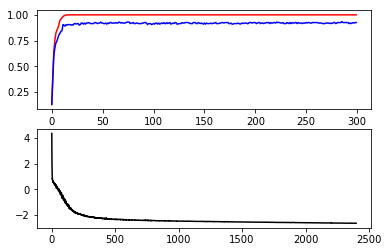

In [143]:
train_acc, test_acc = train.train_accuracy_list, train.test_accuracy_list
loss = train.train_loss_list
print(len(loss))
print(len(train_acc))
accuracy_iter_list = np.arange(len(train_acc))
loss_iter_list = np.arange(len(loss))
plt.figure(1)
plt.subplot(211)
plt.plot(accuracy_iter_list, train_acc,'r')
plt.plot(accuracy_iter_list, test_acc,'b')
plt.subplot(212)
plt.plot(loss_iter_list, np.log(loss),'black')
plt.show()

In [144]:
print(np.amax(np.array(test_acc)))
print(np.amax(np.array(train_acc)))

0.935
1.0
